In [94]:
import numpy as np
import pandas as pd
import csv
import torch
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
T = 100
x = np.arange(0,T)
y1= np.sin(4*np.pi*x/T)
y2= np.cos(4*np.pi*x/T)
#y3= (np.cos(4*np.pi*x/T)+np.sin(4*np.pi*x/T))/np.sqrt(2)
#base_time_series = np.array([y1,y2,y3])
base_time_series = np.array([y1,y2])

In [128]:
#new_series = np.array([[1,0,0],[0,1,0],[0,0,1],[1,2,0],[3,0,1],[1,4,5],[0,1,8]])
#new_series = np.array([[1,0],[0,1],[1,2],[2,1]])
#new_series = np.array([[1,0],[0,1],[1,2],[2,1],[2,2],[2,-1],[1,-2],[1,3],[2,0]])
new_series = np.array([[1,0],[5,1],[4,1],[6,-1],[10,0],[0,1],[1,5],[1,-6],[1,8]])
new_series = np.matmul(new_series,base_time_series)

<AxesSubplot:>

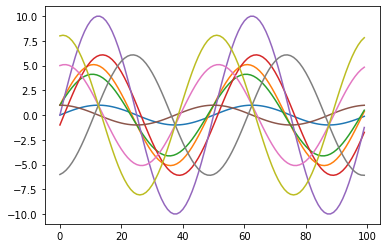

In [129]:
sns.lineplot(x=np.arange(0,T),y=new_series[0])
sns.lineplot(x=np.arange(0,T),y=new_series[1])
sns.lineplot(x=np.arange(0,T),y=new_series[2])
sns.lineplot(x=np.arange(0,T),y=new_series[3])
sns.lineplot(x=np.arange(0,T),y=new_series[4])
sns.lineplot(x=np.arange(0,T),y=new_series[5])
sns.lineplot(x=np.arange(0,T),y=new_series[6])
sns.lineplot(x=np.arange(0,T),y=new_series[7])
sns.lineplot(x=np.arange(0,T),y=new_series[8])

<AxesSubplot:>

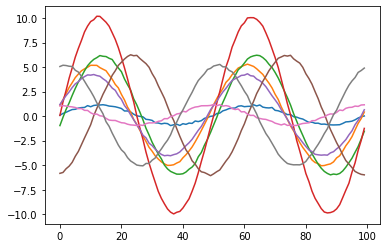

In [132]:
data_to_save = np.zeros((100,3,3))
data_to_save[:,0,0] = new_series[0]
data_to_save[:,0,1] = new_series[1]
data_to_save[:,0,2] = new_series[2]
data_to_save[:,1,0] = new_series[3]
data_to_save[:,1,1] = new_series[4]
data_to_save[:,1,2] = new_series[5]
data_to_save[:,2,0] = new_series[6]
data_to_save[:,2,1] = new_series[7]
data_to_save[:,2,2] = new_series[8]
noise = np.random.rand(*data_to_save.shape)/5
data_to_save += noise
np.save('dataset/sanity_complete.npy',data_to_save)
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0,0])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0,1])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1,0])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1,1])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0,2])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2,1])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1,2])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2,0])

In [133]:
all_examples  = np.zeros((100*3*3,3))
id_ = 0
for i in range(100):
    for j in range(3):
        for k in range(3):
            all_examples[id_,0] = i
            all_examples[id_,1] = j
            all_examples[id_,2] = k
            id_ += 1
np.random.shuffle(all_examples)
np.save('dataset/sanity_test_examples.npy',all_examples[int(2*all_examples.shape[0]/3):])
np.save('dataset/sanity_train_examples.npy',all_examples[:int(2*all_examples.shape[0]/3)])

<AxesSubplot:>

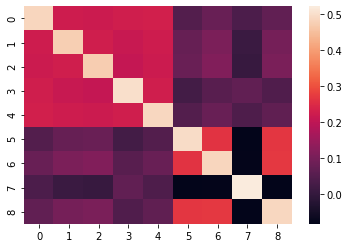

In [134]:
sigma = np.load('dataset/best_sigma.npy')
# sns.heatmap(-np.log(sigma.mean(axis=0)))
sns.heatmap(sigma.mean(axis=0))
# new_series = np.array([[1,0],[0,1],[1,5],[5,1],[4,1],[6,-1],[1,-6],[1,8],[10,0]])
# sigma.mean(axis=0)[1,6]

# sigma[sigma<0] = -1
# sigma[sigma>=0] = 0
# sns.heatmap(sigma.mean(axis=0))


new_series = np.array([[1,0],[5,1],[4,1],[6,-1],[10,0],[0,1],[1,5],[1,-6],[1,8]])

In [135]:
gauss = np.load('janta_gauss_temp.npy')
normalised = np.load('janta_normalised_temp.npy')

<AxesSubplot:>

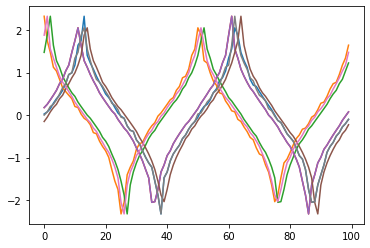

In [138]:
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,3])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,4])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,5])
#sns.lineplot(x=np.arange(0,T),y=data_to_save[:,6])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,7])
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,8])

<AxesSubplot:>

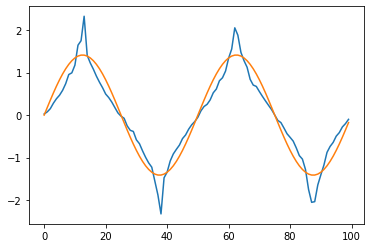

In [110]:
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
data_to_save = normalised
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,1])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,2])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,3])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,4])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,5])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,8])
# sns.lineplot(x=np.arange(0,T),y=data_to_save[:,7])

<AxesSubplot:>

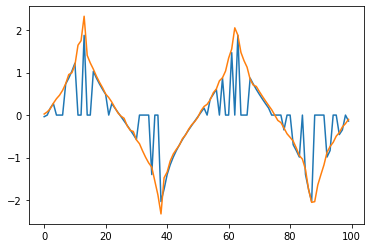

In [122]:
train_gauss = np.load('train_gauss.npy')
sns.lineplot(x=np.arange(0,T),y=train_gauss[:,0,0])
data_to_save = gauss
sns.lineplot(x=np.arange(0,T),y=data_to_save[:,0])